In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

In [7]:
files = os.listdir('img_align_celeba')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('img_align_celeba', files[0]))
plt.imread(os.path.join('img_align_celeba', files[0]))

files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[98])

print(img)

img_align_celeba/000026.jpg
[[[171 206 226]
  [171 206 226]
  [171 206 226]
  ...
  [145 190 211]
  [145 192 212]
  [145 192 212]]

 [[171 206 226]
  [171 206 226]
  [171 206 226]
  ...
  [145 190 211]
  [145 192 212]
  [145 192 212]]

 [[171 206 226]
  [171 206 226]
  [171 206 226]
  ...
  [145 190 211]
  [145 192 212]
  [145 192 212]]

 ...

 [[171 205 217]
  [171 205 217]
  [171 205 217]
  ...
  [255 210  65]
  [255 202  70]
  [255 202  70]]

 [[171 205 217]
  [171 205 217]
  [171 205 217]
  ...
  [249 205  57]
  [252 197  68]
  [252 197  68]]

 [[171 205 217]
  [171 205 217]
  [171 205 217]
  ...
  [248 204  56]
  [254 197  68]
  [254 197  68]]]


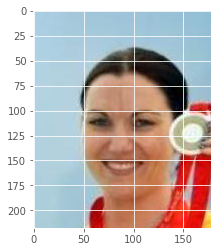

In [8]:
plt.imshow(img)

In [9]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]

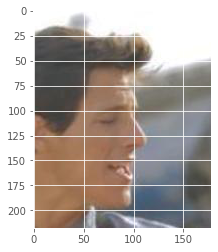

In [10]:
plt.imshow(imgs[99])

In [11]:
imgs[0].shape

(218, 178, 3)

In [29]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(100, 218, 178, 3)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


look at this average person


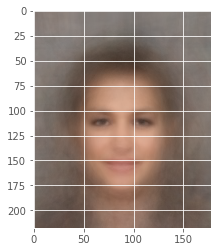

In [13]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img.astype(np.uint8))
print("look at this average person")

This is the standard deviation - the variance of the mean


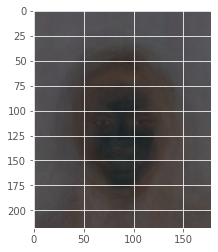

In [14]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))
print("This is the standard deviation - the variance of the mean")

Mean of all colour channels


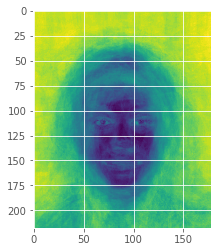

In [15]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8)) # Mean of all colour channels
print("Mean of all colour channels")

# Task 1: Transformations

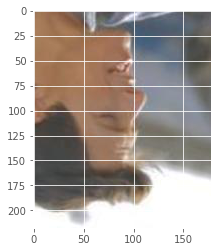

In [169]:
flip_ud_face = np.flipud(data[99])
plt.imshow(flip_ud_face, cmap=plt.cm.gray)

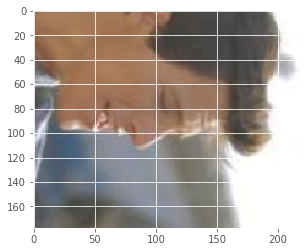

In [171]:
rotate = np.rot90(data[99], 3)
plt.imshow(rotate, cmap=plt.cm.gray)

# Blurring an Image

In [126]:
#create a copy of my grey image and just get first layer (because all layers are same)
copyImg = data[99].copy()[:,:,0]

#get number of rows, columns in our image
numRows,numCols = copyImg.shape

#define how big we want our blurring box to be, the bigger the blurrier
boxSize = 10

#get half the size of the box 
halfBoxSize = int(boxSize/2)

#we can only blur pixels where the box can fit around them (i.e. the edges wont get blurred)
startRow = halfBoxSize
startCol = halfBoxSize

numRows = int(numRows)
numCols = int(numCols)


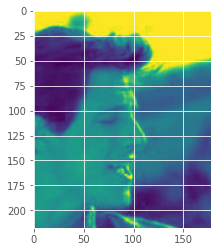

In [127]:
plt.imshow(copyImg)

In [162]:
 #loop over all the valid pixels in the image
for row in range(0, numRows):
    for col in range(0, numCols):
        
        #create the local box around a given pixel
        localPixels =  data[99][row-halfBoxSize:row+halfBoxSize, col-halfBoxSize:col+halfBoxSize]
        
        #take the mean of the pixels in the local box
        blurredValue = np.mean(localPixels)
        
        #set the new value at that pixel to be that blurred value
        copyImg[row,col] = blurredValue

#reshape the flat image to give it a third dimension of 1
copyImg = copyImg.reshape([numRows, numCols,1])

#stack 3 copies of the transformed image together to create the blurred image
blurredImage = np.concatenate([copyImg]*3, axis=2)


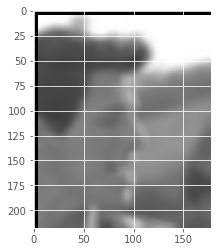

In [161]:
plt.imshow(blurredImage)

In [163]:
def blur(I):
    for i in range(1,I.shape[0]-1):
        for j in range(1,I.shape[1]-1):
            I[i,j] = (4*I[i,j] + I[i-1,j] + I[i+1,j] + I[i,j-1] + I[i,j+1])/8.0
    return I

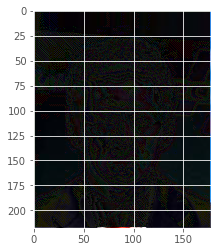

In [165]:
plt.imshow(blur(data[1]))